In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

import seaborn as sns
sns.set_theme(style="whitegrid")

Sometimes mean and variance are not enough to describe a distribution. When calculate variance, need to square the deviations around the mean. In the case of large deviations, do not know whether they are likely to be positiv eor negative. This is where the skewness and symmetry of a distribution come in. A distribution is `symmetric` if the parts in either side of the mean are mirrior images of each other

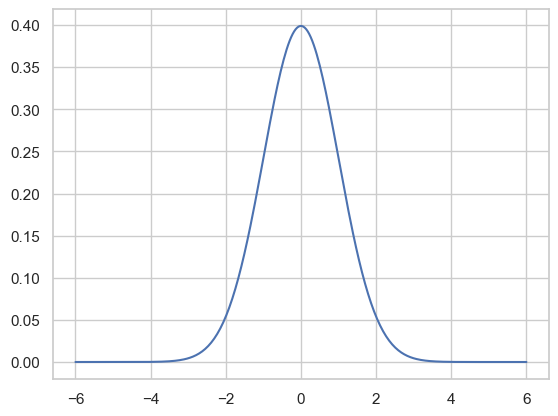

In [2]:
# Plot a normal distribution with mean = 0
# and std dev = 2
xs = np.linspace(-6,6,300)
normal = stats.norm.pdf(xs)
plt.plot(xs, normal)
plt.show()

A distribution which is not symmetric is called `skewed`. 

For instance, a distribution can have many small positive and a few large negative values (negatively skewed) or vice versa (positively skewed) and stilll have a mean of 0.

A symmetric distribution has skewness 0. Positively skewed unimodal (one mode) distributions have the property that mean > median > mode. Negatively skewed unimodal distribtuions are the reverse, with mean < median < mode.

When plotting, for unimodal distributions, a negative skew indicates that the tail is fatter on the left; while a positive skew indicates that the tail is fatter on the right.

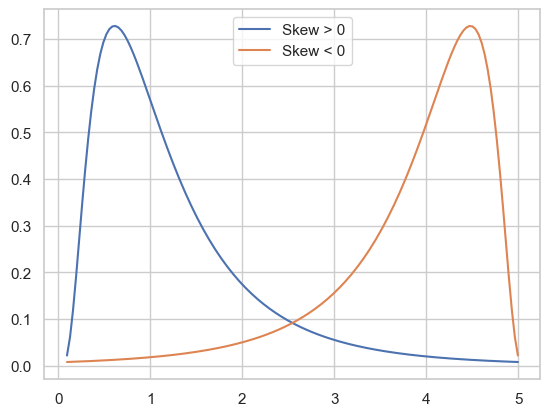

In [3]:
# Generate x-values for which to plot the distribution
xs2 = np.linspace(stats.lognorm.ppf(0.01, .7, loc=-.1), stats.lognorm.ppf(0.99, .7, loc=-.1),150)

# negatively skewed distribution
lognormal = stats.lognorm.pdf(xs2, .7)
plt.plot(xs2, lognormal, label='Skew > 0')

# positively skewed distribution
plt.plot(xs2, lognormal[::-1], label='Skew < 0')
plt.legend()
plt.show()



Although skew is less obvious when graphing discrete data sets, can stilll compute it

Skew:  0.5503264607870976
Mean:  -0.0005819108951409068
Median:  -0.0021574973031284195


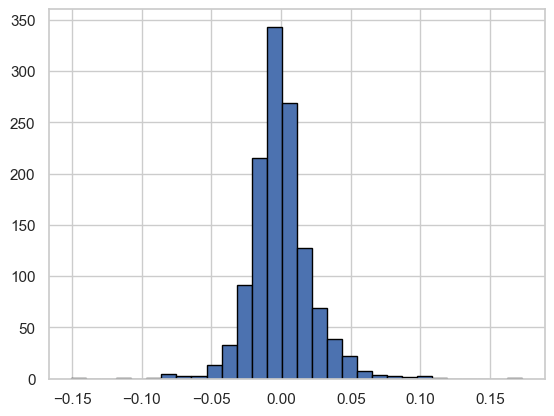

In [4]:
ADBE_df = pd.read_csv('/Users/brendan/Desktop/Python/BoostedAI/prices/ADBE.csv')
returns = ADBE_df['adjClose'].pct_change()[1:]

print('Skew: ', stats.skew(returns))
print('Mean: ', np.mean(returns))
print('Median: ', np.median(returns))

plt.hist(returns, 30, ec='black')
plt.show()

## Kurtosis

**`Kurtosis`** attempts to measure the shape of the deviation from the mean. Generally, it descrubes how peaked a distribution is compared to the normal distribution - this is called `mesokurtic`. All normal distributions, regardless of mean and variance, have a kurtosis of 3. A `leptokurtic` distribution (kurtosis > 3) is highly peaked and has fat tails, while a `playkurtic` distribution (kurtosis < 3) is broad.

Sometimes, however, kurtosis is in excess of the normal distribution (kurtosis- 3) is used, and this is the default in scipy. A leptokurtic distribution has mor frequent large jumps away from the mean than a normal distribution does while playkurtic distribution has fewer>

Excess kurtosis of leptokurtic distribution:  3.0
Excess kurtosis of mesokurtic distribution:  0.0
Excess kurtosis of platykurtic distribution : -0.5937628755982794


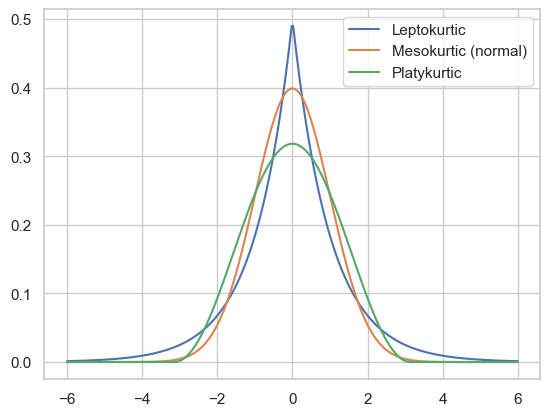

In [5]:
# plot some example distributions
plt.plot(xs, stats.laplace.pdf(xs), label='Leptokurtic')
print('Excess kurtosis of leptokurtic distribution: ', (stats.laplace.stats(moments='k')))

plt.plot(xs, normal, label = 'Mesokurtic (normal)')
print('Excess kurtosis of mesokurtic distribution: ',(stats.norm.stats(moments='k')))

plt.plot(xs, stats.cosine.pdf(xs), label='Platykurtic')
print('Excess kurtosis of platykurtic distribution :', (stats.cosine.stats(moments='k')))

plt.legend()
plt.show()

 Can use `scipy` to find the excess kurtosis of returns:
 

In [6]:
print('Excess kurtosis of returns: ',stats.kurtosis(returns))

Excess kurtosis of returns:  6.872783541486696


The histogram of the returns shows significant observations beyond 3 standard deviations away from the mean, multiple large spikes, so we shouldn't be surprised that the kurtosis is indicating a leptokurtic distribution

## Normality Testing Using Jarque-Bera

The Jarque-Bera test is a common statistical test that compares whether sample data has skewness and kurtosis similar to a normal distribution. Can run it here to find the p-values on the returns array

The Jarque-Bera test's null hypothesis is that the data came from a normal distribution. Use a cutoff of 0.05 for the p-value

### Test calibration

In [7]:
from statsmodels.stats.stattools import jarque_bera

N = 1000
M = 1000

p_values = np.ndarray((N))

for i in range(N):
    # draw M samples from a normal distribution
    X = np.random.normal(0,1,M)
    _, p_value, _, _ = jarque_bera(X)
    p_values[i] = p_value

# count number of p_values below default of 0.05
num_significant = len(p_values[p_values < 0.05])

print(float(num_significant/N))

0.052


If properly calibrated, should expect to be wrong 5% of the time at a 0.05 level, and this is fairly close